# Polynomial Regression
- 실생활 데이터들은 선형 보다는 비선형 형태를 띄고 있는 경우가 많습니다. 이럴 경우 선형 모델로는 원하는 성능을 얻을 수 없습니다. 이때는 비선형 데이터를 고차원 함수를 통해 새로운 공간에 맵핑하여 선형 회귀를 이용하는 방법이 많이 쓰입니다.<br>
- PolynomialFeatures 함수는 주어인 degree 를 이용하여 입력된 데이터를 새로운 차원으로 맵핑한 결과를 돌려 줍니다.

In [1]:
from sklearn import preprocessing
import numpy as np
X = np.arange(6).reshape(3, 2)
print(X)

poly = preprocessing.PolynomialFeatures(degree=2)
new_X = poly.fit_transform(X)
print(new_X)

[[0 1]
 [2 3]
 [4 5]]
[[ 1.  0.  1.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.]
 [ 1.  4.  5. 16. 20. 25.]]


- [x1,x2] 변수를 [1,x1,x2,x21,x1x2,x22] 2차원 공간으로 맵핑한 전처리 결과입니다. 
- 전처리 후에는 다양한 선형 회귀 함수들을 이용하여 모델을 만드는 것이 가능합니다.
- 경우에 따라서 고차원 맵핑이 아닌 교차 특징(intersaction features)
  [1,x1,x2,x1x2]만 필요한 경우는 interaction_only=True 를 사용할 수 있습니다. 
  예를 들면 XOR 문제를 이 방식으로 선형 회귀를 통해 풀수 있게 됩니다.

In [2]:
import warnings
warnings.filterwarnings("ignore")
from sklearn import linear_model
from sklearn import preprocessing
import numpy as np

In [4]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = X[:, 0] ^ X[:, 1]
print(X)
print(y)

[[0 0]
 [0 1]
 [1 0]
 [1 1]]
[0 1 1 0]


In [5]:
X = preprocessing.PolynomialFeatures(interaction_only=True).fit_transform(X).astype(int)
print(X)
clf = linear_model.Perceptron(fit_intercept=False, max_iter=10, tol=None, shuffle=False).fit(X, y)

[[1 0 0 0]
 [1 0 1 0]
 [1 1 0 0]
 [1 1 1 1]]


In [6]:
clf.predict(X)
print(clf.score(X, y))

1.0


In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn import datasets, preprocessing, model_selection, linear_model, metrics

data shape: np_data_xs=(1000, 1), np_data_ys=(1000,)
train shape: np_train_xs=(700, 1), np_train_ys=(700,)
test shape: np_test_xs=(300, 1), np_test_ys=(300,)


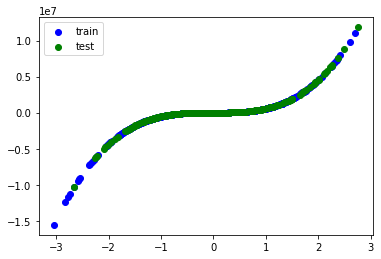

In [8]:
# 데이터
np.random.seed(0)
n_samples = 1000
# np_data_xs = 2 - 3 * np.random.normal(0, 1, n_samples)
# np_data_ys = np_data_xs - 2 * (np_data_xs ** 2) + 0.5 * (np_data_xs ** 3) + np.random.normal(-3, 3, n_samples)
# np_data_xs = np_data_xs.reshape(-1, 1)
# np_data_ys = np_data_ys.reshape(-1)
np_data_xs, np_data_ys = datasets.make_regression(
    n_samples=n_samples, # 데이터 수
    n_features=1, # X feature 수
    bias=1.0, # Y 절편
    noise=0.3, # X 변수들에 더해지는 잡음의 표준 편차
    random_state=0) # 난수 발생용 Seed 값
np_data_ys = np_data_ys**3 # Y 차원
print("data shape: np_data_xs={}, np_data_ys={}".format(np_data_xs.shape, np_data_ys.shape))
np_train_xs, np_test_xs, np_train_ys, np_test_ys = model_selection.train_test_split(
    np_data_xs, np_data_ys, 
    test_size=0.3, shuffle=True, random_state=2)
print("train shape: np_train_xs={}, np_train_ys={}".format(np_train_xs.shape, np_train_ys.shape))
print("test shape: np_test_xs={}, np_test_ys={}".format(np_test_xs.shape, np_test_ys.shape))
plt.scatter(np_train_xs, np_train_ys, label='train', c='b')
plt.scatter(np_test_xs, np_test_ys, label='test', c='g')
plt.legend()
plt.show()

In [9]:
# 전처리
# PolynomialFeature 로 변환
poly = preprocessing.PolynomialFeatures(degree=3)
np_train_poly_xs = poly.fit_transform(np_train_xs)
np_test_poly_xs = poly.transform(np_test_xs)

In [10]:
# 모델
models = [
    linear_model.LinearRegression()
]
models

[LinearRegression()]


model=LinearRegression()
r_square=0.99997


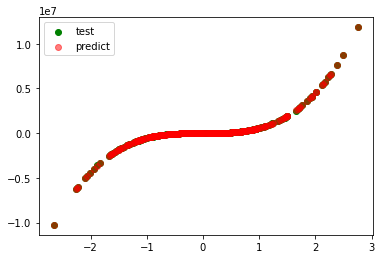

In [11]:
for model in models:
    # 학습
    print("\nmodel={}".format(model))
    model.fit(np_train_poly_xs, np_train_ys)

    # 평가
    np_pred_ys = model.predict(np_test_poly_xs)

    r_square = metrics.r2_score(np_test_ys, np_pred_ys)
    print("r_square={:.5f}".format(r_square))
    
    plt.scatter(np_test_xs, np_test_ys, label='test', c='g')
    plt.scatter(np_test_xs, np_pred_ys, label='predict', c='r', alpha=0.5)
    plt.legend()
    plt.show()